# This is my noteboook

In terminal, type `jupyter notebook`

View > Cell Toolbars > Slideshow

Open new terminal and type `jupyter nbconvert Notebook.ipynb --to slides --post serve`

1. My
2. List

* a
* b

In [1]:
import pandas as pd


In [2]:
prop= pd.read_csv('property-prices.csv')
prop = prop[["Time", "Sydney", "Melbourne", "Brisbane", "Adelaide", "Perth", "Hobart", "Darwin", "Canberra", "Weighted Average"]]
prop["Time"] = pd.to_datetime(prop["Time"], format="%b-%y")
prop.set_index("Time", inplace=True)

##############################################################

wage= pd.read_csv('wage-change.csv')
wage = wage[["Time", "NSW", "QLD", "SA", "WA", "TAS", "NT", "ACT", "Avg"]]
wage["Time"] = pd.to_datetime(wage["Time"])
wage.set_index("Time", inplace=True)

##############################################################

cpi= pd.read_csv('cpi.csv')
cpi = cpi[["Time", "Sydney", "Melbourne", "Brisbane", "Adelaide", "Perth", "Hobart", "Darwin", "Canberra", "Australian Average"]]
cpi["Time"] = pd.to_datetime(cpi["Time"], format="%b-%Y")
cpi.set_index("Time", inplace=True)

In [3]:
# Combining Data Function
def combine_datasets(prop_col, wage_col, cpi_col):
    prop_city = prop[[prop_col]]
    prop_city.columns = ["Property Prices"]
    wage_state = wage[[wage_col]]
    wage_state.columns = ["Wages"]
    cpi_city = cpi[[cpi_col]]
    cpi_city.columns = ["CPI"]

    combined = prop_city.join(wage_state).join(cpi_city)

    for c in combined.columns:
        combined[c] = combined[c] / combined[c][0] * 100 # maths for basing data at 100 for same relative change in index
    
    return(combined)

### Here's something about our contry:

<AxesSubplot:title={'center':'Wage Change in Australia (%)'}, xlabel='Time', ylabel='Wage Index'>

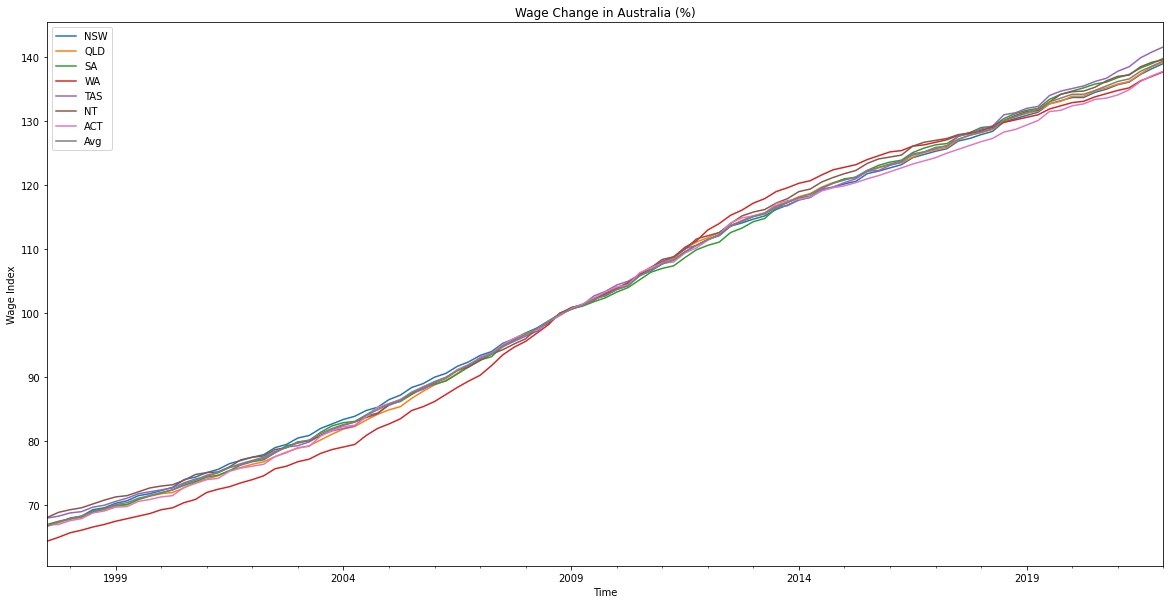

In [4]:
wage.plot(figsize=(20, 10), title="Wage Change in Australia (%)", ylabel="Wage Index")

### As a country with a solid economy on the global scale and steady long term wage growth... blah blah blah...
<img src="Capture.PNG" width="100">

### btw the CPI takes property value into account and it can be assumed that the difference is actually marginally larger

<AxesSubplot:title={'center':'Housing Affordability (SA)'}, ylabel='Relative % Change Since 2012'>

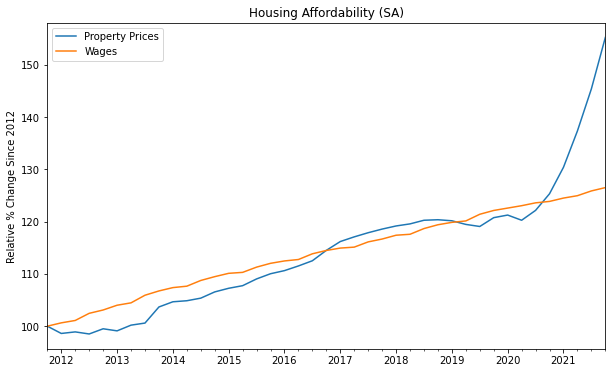

In [5]:
combined_nsw = combine_datasets("Adelaide", "SA", "Adelaide")
combined_nsw.head()

combined_nsw[["Property Prices", "Wages"]]\
    .plot(figsize=(10, 6), title="Housing Affordability (SA)", ylabel="Relative % Change Since 2012", xlabel="")

<AxesSubplot:title={'center':'Housing Unaffordability (NSW)'}, ylabel='Relative % Change Since 2012'>

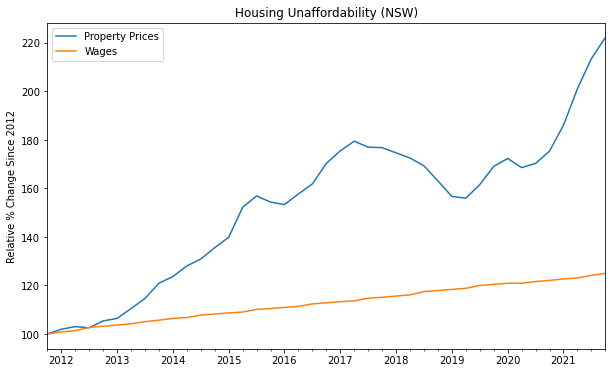

In [6]:
combined_nsw = combine_datasets("Sydney", "NSW", "Sydney")
combined_nsw.head()

combined_nsw[["Property Prices", "Wages"]]\
    .plot(figsize=(10, 6), title="Housing Unaffordability (NSW)", ylabel="Relative % Change Since 2012", xlabel="")

<AxesSubplot:title={'center':'Housing Unaffordability (NSW)'}, ylabel='Relative % Change Since 2012'>

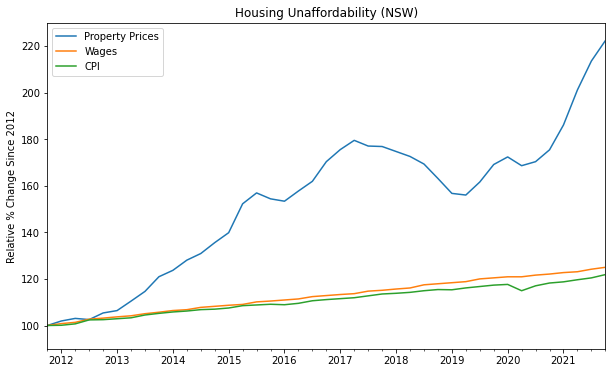

In [7]:
combined_nsw[["Property Prices", "Wages", "CPI"]]\
    .plot(figsize=(10, 6), title="Housing Unaffordability (NSW)",
          ylabel="Relative % Change Since 2012", xlabel="", ylim=(90, 230))

<AxesSubplot:title={'center':'Housing Affordability (Australia)'}, ylabel='Relative % Change Since 2012'>

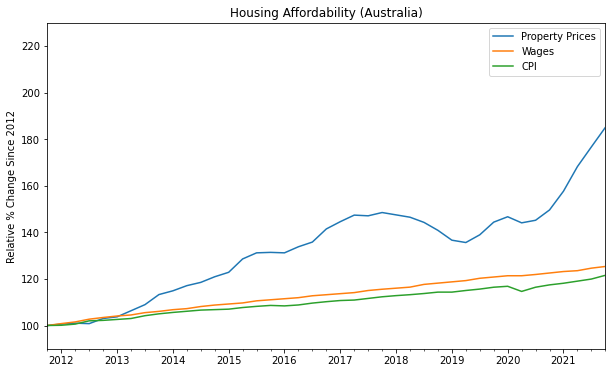

In [8]:
combined_nsw = combine_datasets("Weighted Average", "Avg", "Australian Average")
combined_nsw.head()

combined_nsw[["Property Prices", "Wages", "CPI"]]\
    .plot(figsize=(10, 6), title="Housing Affordability (Australia)",
          ylabel="Relative % Change Since 2012", xlabel="", ylim=(90, 230))

<AxesSubplot:xlabel='Time', ylabel='Property Price Index'>

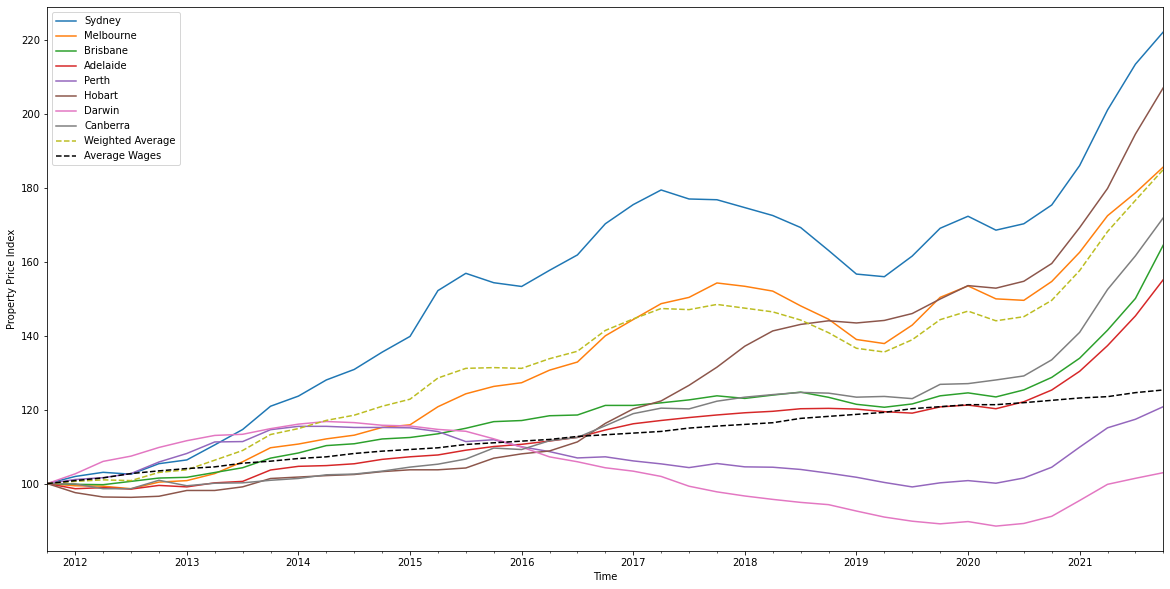

In [9]:
wages_aus = wage[["Avg"]]
wages_aus.columns = ["Average Wages"]
prop_with_wages = prop.join(wages_aus)

for c in prop_with_wages.columns:
    prop_with_wages[c] = prop_with_wages[c] / prop_with_wages[c][0] * 100

prop_with_wages.plot(figsize=(20, 10), ylabel="Property Price Index",
                     style={"Average Wages": "k--", "Weighted Average": "--"})